In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [3]:
with_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/with_mask")
without_mask_folder = os.path.join(os.getcwd(),"../Data/dataset/without_mask")

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,dsize=(128,128))
        if img is not None:
            images.append(img)
    return images

In [5]:
images_with_mask = load_images_from_folder(with_mask_folder)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [6]:
images_without_mask = load_images_from_folder(without_mask_folder)

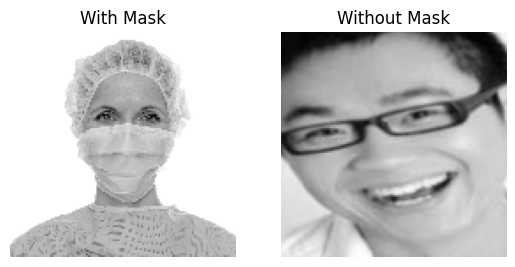

In [7]:
fig,[ax1,ax2] = plt.subplots(1,2)

ax1.axis("off")
ax1.set_title("With Mask")
ax1.imshow(images_with_mask[2],cmap="gray")

ax2.axis("off")
ax2.set_title("Without Mask")
ax2.imshow(images_without_mask[2],cmap="gray")

plt.show()

In [8]:
print(len(images_with_mask))
print(len(images_without_mask))

2165
1930


In [9]:
labels_with_mask = np.ones(len(images_with_mask))
labels_without_mask = np.zeros(len(images_without_mask))

In [10]:
X = np.concatenate((images_with_mask,images_without_mask),axis=0)
y = np.concatenate((labels_with_mask,labels_without_mask),axis=0)

In [11]:
X_normalized = [x/255.0 for x in X]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=56)

In [13]:
from skimage.feature import hog

X_train_hog_features = []
X_train_hog_images = []
for image in X_train:
    features, h_img = hog(image, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    X_train_hog_features.append(features)
    X_train_hog_images.append(h_img)


In [14]:
X_test_hog_features = []
X_test_hog_images = []
for image in X_test:
    features, h_img = hog(image, pixels_per_cell=(8,8), cells_per_block=(2,2), visualize=True)
    X_test_hog_features.append(features)
    X_test_hog_images.append(h_img)

In [15]:
X_train_hog_features = np.array(X_train_hog_features)
X_train_hog_images = np.array(X_train_hog_images)
X_test_hog_features = np.array(X_test_hog_features)
X_test_hog_images = np.array(X_test_hog_images)

In [16]:
print(X_train_hog_features.shape,y_train.shape)
print(X_test_hog_features.shape,y_test.shape)

(3276, 8100) (3276,)
(819, 8100) (819,)


In [17]:
def fit_and_predict(X_train,y_train,X_test,model):
    svc = SVC()
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)

    with open(model, "wb") as f:
        pickle.dump(svc, f)

    return y_pred

In [18]:
y_pred_hog = fit_and_predict(X_train_hog_features,y_train,X_test_hog_features,"/home/aditya/VR_MiniProject/model/HOG_SVC.pkl")
y_pred_hog.shape

(819,)

In [19]:
def show_evaluations(y_true,y_pred,feature_extraction):

    print(feature_extraction)
    print("-------------------------------")
    print(f"accuracy score : {accuracy_score(y_pred,y_true)}")
    print(f"confusion_matrix :\n {confusion_matrix(y_pred,y_true)}")
    print(f"classification_report: \n{classification_report(y_pred,y_true)}")

In [20]:
def plot_(X_test,y_pred,y_test):
    fig,axes = plt.subplots(5,5,figsize=(18,8))
    for i in range(5*5):
        r,c = i//5,i%5
        rand = np.random.randint(len(X_test))
        axes[r][c].axis("off")
        axes[r][c].set_title("correct prediction" if y_pred[rand]==y_test[rand] else "wrong prediction")
        axes[r][c].imshow(X_test[rand],cmap="gray")
    plt.show()

In [21]:
show_evaluations(y_test,y_pred_hog,"HOG")

HOG
-------------------------------
accuracy score : 0.9255189255189256
confusion_matrix :
 [[327  20]
 [ 41 431]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       347
         1.0       0.96      0.91      0.93       472

    accuracy                           0.93       819
   macro avg       0.92      0.93      0.92       819
weighted avg       0.93      0.93      0.93       819



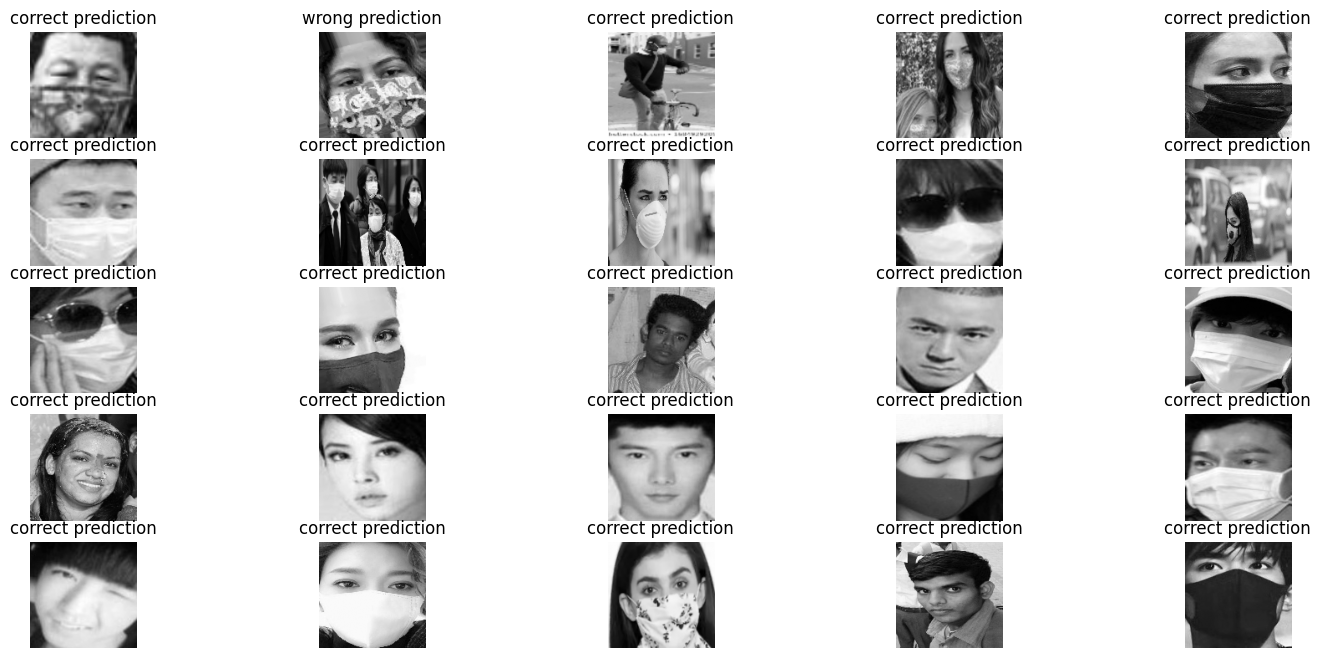

In [22]:
plot_(X_test,y_pred_hog,y_test)

In [23]:
from skimage.feature import local_binary_pattern

X_train_lbp_features = []
for image in X_train:
    features = local_binary_pattern(image,P=8, R=1, method="uniform").flatten()
    X_train_lbp_features.append(features)

In [24]:
X_test_lbp_features = []
for image in X_test:
    features = local_binary_pattern(image,P=8, R=1, method="uniform").flatten()
    X_test_lbp_features.append(features)

In [25]:
y_pred_lbp = fit_and_predict(X_train_lbp_features,y_train,X_test_lbp_features,"/home/aditya/VR_MiniProject/model/LBP_SVC.pkl")
y_pred_lbp.shape

(819,)

In [26]:
show_evaluations(y_test,y_pred_lbp,"LBP")

LBP
-------------------------------
accuracy score : 0.8534798534798534
confusion_matrix :
 [[295  47]
 [ 73 404]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       342
         1.0       0.90      0.85      0.87       477

    accuracy                           0.85       819
   macro avg       0.85      0.85      0.85       819
weighted avg       0.86      0.85      0.85       819



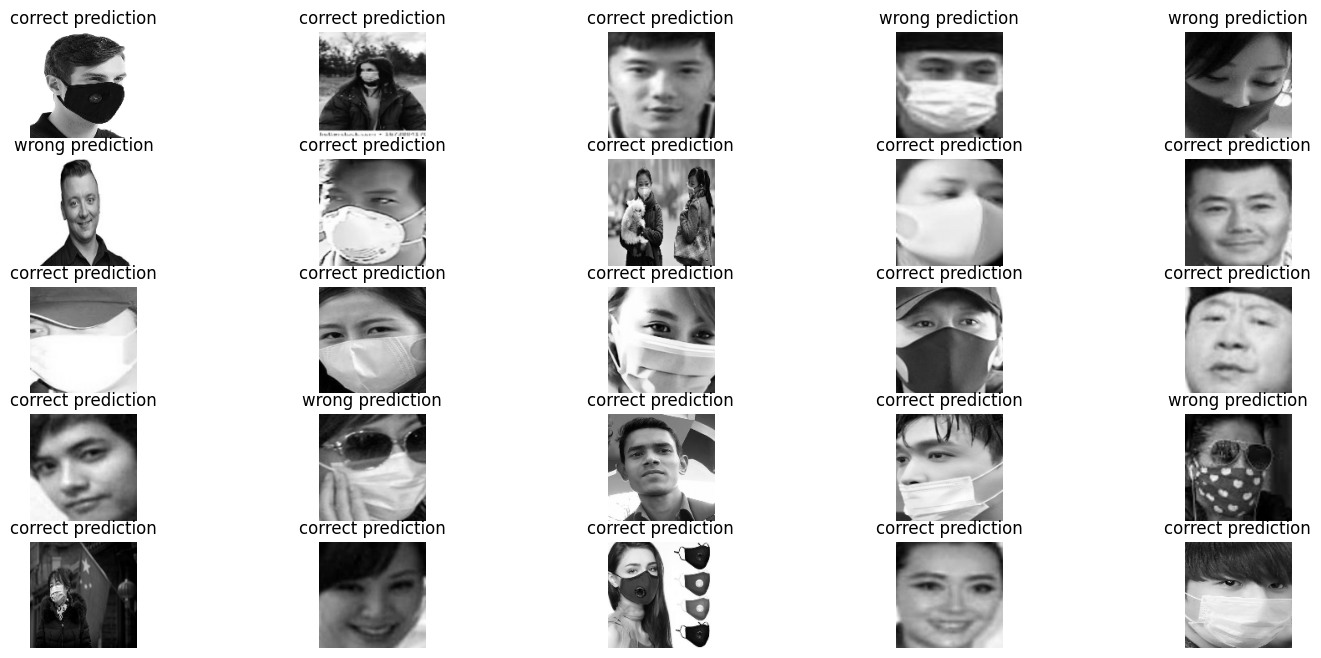

In [27]:
plot_(X_test,y_pred_lbp,y_test)

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset

In [29]:
class NueralNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=8100, out_features=128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.10)
        self.layer_2 = nn.Linear(in_features=128, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features= 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_3(x)
        return x

In [30]:
nnet = NueralNetwork()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=nnet.parameters(), lr=0.01)

In [31]:
X_train_hog_features_tensor = torch.tensor(X_train_hog_features,dtype=torch.float32)
X_test_hog_features_tensor = torch.tensor(X_test_hog_features,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
y_test  = torch.tensor(y_test,dtype=torch.float32)

In [32]:
print(y_train.shape)

torch.Size([3276])


In [33]:
print(X_test_hog_features_tensor.shape)

torch.Size([819, 8100])


In [34]:
epochs = 101

for epoch in range(epochs):
    
    nnet.train()
    optimizer.zero_grad()

    y_logits = nnet(X_train_hog_features_tensor)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits.squeeze(), y_train.float())
    acc = accuracy_score(y_pred.squeeze().detach().cpu().numpy(), y_train.cpu().numpy())

    loss.backward()
    optimizer.step()

    if epoch%5==0:
        nnet.eval()
        print(f"Epoch {epoch}", f"Loss: {loss.item()}", f"accuracy: {acc}")

        with torch.inference_mode():
            test_logits = nnet(X_test_hog_features_tensor).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits, y_test.float())
            test_acc = accuracy_score(test_pred, y_test)

            print(f"Epoch {epoch}", f"Test Loss: {test_loss.item()}", f"Test Accuracy: {test_acc}")


Epoch 0 Loss: 0.6927659511566162 accuracy: 0.5231990231990232
Epoch 0 Test Loss: 0.7417799234390259 Test Accuracy: 0.4481074481074481
Epoch 5 Loss: 1.1535683870315552 accuracy: 0.47710622710622713
Epoch 5 Test Loss: 0.7363923788070679 Test Accuracy: 0.44932844932844934
Epoch 10 Loss: 0.5766740441322327 accuracy: 0.7478632478632479
Epoch 10 Test Loss: 0.5764328837394714 Test Accuracy: 0.7326007326007326
Epoch 15 Loss: 0.5133267641067505 accuracy: 0.7518315018315018
Epoch 15 Test Loss: 0.4450918734073639 Test Accuracy: 0.8229548229548229
Epoch 20 Loss: 0.4085911810398102 accuracy: 0.8174603174603174
Epoch 20 Test Loss: 0.3856287896633148 Test Accuracy: 0.8351648351648352
Epoch 25 Loss: 0.3431530296802521 accuracy: 0.8547008547008547
Epoch 25 Test Loss: 0.3559609353542328 Test Accuracy: 0.851037851037851
Epoch 30 Loss: 0.3017270863056183 accuracy: 0.8727106227106227
Epoch 30 Test Loss: 0.30570176243782043 Test Accuracy: 0.8766788766788767
Epoch 35 Loss: 0.24984103441238403 accuracy: 0.901

In [35]:
X_test_hog_features_tensor.shape

torch.Size([819, 8100])

In [36]:
nnet.eval()
with torch.inference_mode():
    y_pred_nn = nnet(X_test_hog_features_tensor)
    y_pred_nn = torch.round(torch.sigmoid(y_pred_nn))

In [37]:
show_evaluations(y_test,y_pred_nn,"Nueral Network")

Nueral Network
-------------------------------
accuracy score : 0.9108669108669109
confusion_matrix :
 [[326  31]
 [ 42 420]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       357
         1.0       0.93      0.91      0.92       462

    accuracy                           0.91       819
   macro avg       0.91      0.91      0.91       819
weighted avg       0.91      0.91      0.91       819



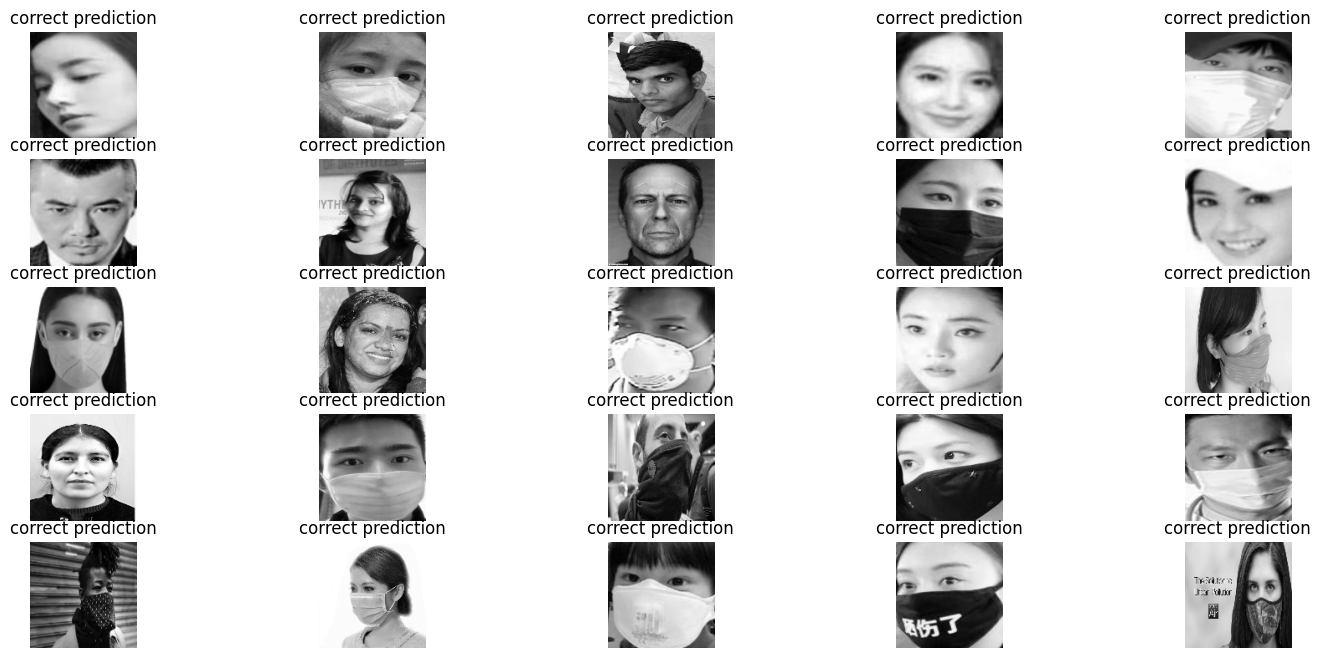

In [38]:
plot_(X_test,y_pred_nn,y_test)

In [39]:
torch.save(nnet.state_dict(),"/home/aditya/VR_MiniProject/model/NueralNetwork")

## CNN

In [40]:
X_train_resized = []
for i,img in enumerate(X_train):
    X_train_resized.append(cv2.resize(img,dsize=(128,128)))

In [41]:
X_test_resized = []
for i,img in enumerate(X_test):
    X_test_resized.append(cv2.resize(img,dsize=(128,128)))

In [42]:
import torch
import torch.nn as nn

class MaskPredictorCNN(nn.Module):

    def __init__(self, input_channels=1, hidden_units=32, output_shape=1,image_shape=128):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),  
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * image_shape//4 * image_shape//4, out_features=256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.4),
            nn.Linear(in_features=256, out_features=output_shape)
        )

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


In [43]:
mpcnn = MaskPredictorCNN(1,32,1,128)

In [44]:
untrained_prediction = mpcnn(torch.rand((6,1,128,128)))

print((torch.rand((6,1,128,128)).shape))

print(untrained_prediction)
print(torch.sigmoid(untrained_prediction))
print(torch.round(torch.sigmoid(untrained_prediction)))

torch.Size([6, 1, 128, 128])
tensor([[-0.5473],
        [ 0.0466],
        [-0.1058],
        [-0.7151],
        [-0.6651],
        [-0.2594]], grad_fn=<AddmmBackward0>)
tensor([[0.3665],
        [0.5116],
        [0.4736],
        [0.3285],
        [0.3396],
        [0.4355]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)


In [45]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(lr=0.05,params = mpcnn.parameters())

In [46]:
X_train_tensor = torch.tensor(X_train_resized, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_resized, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

/tmp/ipykernel_7358/2546103480.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_train_tensor = torch.tensor(X_train_resized, dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_7358/2546103480.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
/tmp/ipykernel_7358/2546103480.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [47]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

# Define hyperparameter grid including epochs
param_grid = {
    "learning_rate": [0.01, 0.001, 0.0001],
    "batch_size": [32, 64],
    "optimizer": ["adam", "sgd"],
    "epochs": [10, 20, 30] 
}

best_acc = 0
best_params = None

# Loop through each combination of hyperparameters
for params in ParameterGrid(param_grid):
    print(f"Testing params: {params}")


    mpcnn = MaskPredictorCNN()  
    loss_fn = nn.BCEWithLogitsLoss()

    # Select optimizer
    if params["optimizer"] == "adam":
        optimizer = optim.Adam(mpcnn.parameters(), lr=params["learning_rate"])
    else:
        optimizer = optim.SGD(mpcnn.parameters(), lr=params["learning_rate"])

    # Adjust batch size in DataLoader
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=params["batch_size"], shuffle=False)

    # Training loop for given epochs
    for epoch in tqdm(range(params["epochs"]), desc=f"Training with {params}"):
        train_loss = 0
        train_acc = 0

        for batch, (X, y) in enumerate(train_dataloader):
            mpcnn.train()
            optimizer.zero_grad()

            y_logits = mpcnn(X)
            y_pred = torch.round(torch.sigmoid(y_logits))

            loss = loss_fn(y_logits.squeeze(), y)
            loss.backward()
            optimizer.step()

            train_acc += accuracy_score(y_pred.detach().numpy(), y)
            train_loss += loss.item()

        train_loss /= len(train_dataloader)
        train_acc /= len(train_dataloader)

        test_loss, test_acc = 0, 0

        if epoch % 10 == 0 or epoch == params["epochs"] - 1:  # Evaluate every 10 epochs & at the last epoch
            mpcnn.eval()
            with torch.inference_mode():
                for X, y in test_dataloader:
                    y_logits_test = mpcnn(X)
                    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
                    test_loss += loss_fn(y_logits_test.squeeze(), y).item()
                    test_acc += accuracy_score(y_pred_test.detach().numpy(), y)

                test_loss /= len(test_dataloader)
                test_acc /= len(test_dataloader)

            print(f"Epoch {epoch}: Train Loss {train_loss:.4f}, Test Loss {test_loss:.4f}")
            print(f"Train Acc {train_acc*100:.2f}%, Test Acc {test_acc*100:.2f}%\n")

    # Save best hyperparameters
    if test_acc > best_acc:
        best_acc = test_acc
        best_params = params

print(f"Best Parameters: {best_params} with Accuracy: {best_acc*100:.2f}%")


Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}:   0%|          | 0…

Epoch 0: Train Loss 0.4639, Test Loss 0.4278
Train Acc 78.87%, Test Acc 80.00%

Epoch 9: Train Loss 0.0814, Test Loss 0.1623
Train Acc 97.09%, Test Acc 94.27%

Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'}:   0%|          | 0/…

Epoch 0: Train Loss 0.4119, Test Loss 0.3583
Train Acc 80.93%, Test Acc 84.01%

Epoch 9: Train Loss 0.0666, Test Loss 0.2940
Train Acc 97.97%, Test Acc 87.94%

Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}:   0%|          | …

Epoch 0: Train Loss 0.3945, Test Loss 0.4078
Train Acc 81.73%, Test Acc 80.44%

Epoch 9: Train Loss 0.0244, Test Loss 0.1207
Train Acc 99.33%, Test Acc 95.67%

Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'sgd'}:   0%|          | 0…

Epoch 0: Train Loss 0.5611, Test Loss 0.4955
Train Acc 71.60%, Test Acc 79.80%

Epoch 9: Train Loss 0.2708, Test Loss 0.2668
Train Acc 89.21%, Test Acc 90.82%

Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'adam'}:   0%|          |…

Epoch 0: Train Loss 0.4045, Test Loss 0.5067
Train Acc 80.83%, Test Acc 73.42%

Epoch 9: Train Loss 0.0525, Test Loss 0.3292
Train Acc 98.79%, Test Acc 86.17%

Testing params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'sgd'}:   0%|          | …

Epoch 0: Train Loss 0.6859, Test Loss 0.6787
Train Acc 57.93%, Test Acc 52.50%

Epoch 9: Train Loss 0.4562, Test Loss 0.5589
Train Acc 79.39%, Test Acc 67.73%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'adam'}:   0%|          | 0…

Epoch 0: Train Loss 0.5032, Test Loss 0.3653
Train Acc 75.79%, Test Acc 84.17%

Epoch 10: Train Loss 0.0624, Test Loss 0.2626
Train Acc 97.82%, Test Acc 91.95%

Epoch 19: Train Loss 0.0517, Test Loss 0.2031
Train Acc 98.18%, Test Acc 94.15%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'sgd'}:   0%|          | 0/…

Epoch 0: Train Loss 0.4241, Test Loss 0.3239
Train Acc 80.32%, Test Acc 86.61%

Epoch 10: Train Loss 0.0709, Test Loss 0.5668
Train Acc 97.66%, Test Acc 79.36%

Epoch 19: Train Loss 0.0277, Test Loss 0.9124
Train Acc 99.32%, Test Acc 76.59%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}:   0%|          | …

Epoch 0: Train Loss 0.3924, Test Loss 0.3954
Train Acc 82.78%, Test Acc 80.68%

Epoch 10: Train Loss 0.0174, Test Loss 0.1676
Train Acc 99.42%, Test Acc 95.19%

Epoch 19: Train Loss 0.0144, Test Loss 0.1522
Train Acc 99.67%, Test Acc 95.07%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}:   0%|          | 0…

Epoch 0: Train Loss 0.5441, Test Loss 0.5109
Train Acc 73.53%, Test Acc 72.46%

Epoch 10: Train Loss 0.2509, Test Loss 0.2818
Train Acc 90.11%, Test Acc 89.14%

Epoch 19: Train Loss 0.1679, Test Loss 0.2731
Train Acc 94.18%, Test Acc 88.30%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'adam'}:   0%|          |…

Epoch 0: Train Loss 0.3787, Test Loss 0.3443
Train Acc 82.99%, Test Acc 83.65%

Epoch 10: Train Loss 0.0422, Test Loss 0.2358
Train Acc 99.03%, Test Acc 90.98%

Epoch 19: Train Loss 0.0236, Test Loss 0.2604
Train Acc 99.42%, Test Acc 91.10%

Testing params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'sgd'}:   0%|          | …

Epoch 0: Train Loss 0.6892, Test Loss 0.6466
Train Acc 58.88%, Test Acc 59.03%

Epoch 10: Train Loss 0.4541, Test Loss 0.5072
Train Acc 80.71%, Test Acc 74.18%

Epoch 19: Train Loss 0.4126, Test Loss 0.4515
Train Acc 82.55%, Test Acc 79.80%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.01, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.01, 'optimizer': 'adam'}:   0%|          | 0…

Epoch 0: Train Loss 0.4982, Test Loss 0.5203
Train Acc 76.57%, Test Acc 78.40%

Epoch 10: Train Loss 0.0545, Test Loss 0.2039
Train Acc 98.03%, Test Acc 92.11%

Epoch 20: Train Loss 0.0284, Test Loss 0.1657
Train Acc 99.03%, Test Acc 95.67%

Epoch 29: Train Loss 0.0351, Test Loss 0.1603
Train Acc 98.63%, Test Acc 94.59%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.01, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.01, 'optimizer': 'sgd'}:   0%|          | 0/…

Epoch 0: Train Loss 0.4227, Test Loss 0.5933
Train Acc 80.75%, Test Acc 65.73%

Epoch 10: Train Loss 0.0530, Test Loss 0.1680
Train Acc 98.67%, Test Acc 92.83%

Epoch 20: Train Loss 0.0324, Test Loss 0.1871
Train Acc 99.06%, Test Acc 93.10%

Epoch 29: Train Loss 0.0190, Test Loss 0.6200
Train Acc 99.56%, Test Acc 81.04%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.001, 'optimizer': 'adam'}:   0%|          | …

Epoch 0: Train Loss 0.3937, Test Loss 0.4135
Train Acc 82.17%, Test Acc 80.44%

Epoch 10: Train Loss 0.0213, Test Loss 0.2191
Train Acc 99.45%, Test Acc 93.47%

Epoch 20: Train Loss 0.0168, Test Loss 0.1375
Train Acc 99.34%, Test Acc 95.55%

Epoch 29: Train Loss 0.0162, Test Loss 0.2921
Train Acc 99.51%, Test Acc 94.95%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.001, 'optimizer': 'sgd'}:   0%|          | 0…

Epoch 0: Train Loss 0.5429, Test Loss 0.4939
Train Acc 73.53%, Test Acc 77.63%

Epoch 10: Train Loss 0.2662, Test Loss 0.3642
Train Acc 89.22%, Test Acc 81.32%

Epoch 20: Train Loss 0.1799, Test Loss 0.3559
Train Acc 93.78%, Test Acc 82.12%

Epoch 29: Train Loss 0.1343, Test Loss 0.2639
Train Acc 95.75%, Test Acc 88.13%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.0001, 'optimizer': 'adam'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.0001, 'optimizer': 'adam'}:   0%|          |…

Epoch 0: Train Loss 0.4112, Test Loss 0.4532
Train Acc 80.62%, Test Acc 75.66%

Epoch 10: Train Loss 0.0443, Test Loss 0.1912
Train Acc 99.39%, Test Acc 92.83%

Epoch 20: Train Loss 0.0213, Test Loss 0.2253
Train Acc 99.45%, Test Acc 92.23%

Epoch 29: Train Loss 0.0171, Test Loss 0.3032
Train Acc 99.64%, Test Acc 89.42%

Testing params: {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.0001, 'optimizer': 'sgd'}


Training with {'batch_size': 32, 'epochs': 30, 'learning_rate': 0.0001, 'optimizer': 'sgd'}:   0%|          | …

Epoch 0: Train Loss 0.6754, Test Loss 0.6510
Train Acc 58.77%, Test Acc 61.64%

Epoch 10: Train Loss 0.4537, Test Loss 0.4781
Train Acc 79.49%, Test Acc 76.07%

Epoch 20: Train Loss 0.3987, Test Loss 0.4192
Train Acc 82.75%, Test Acc 82.12%

Epoch 29: Train Loss 0.3755, Test Loss 0.3941
Train Acc 84.06%, Test Acc 82.84%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}:   0%|          | 0…

Epoch 0: Train Loss 0.4864, Test Loss 0.5089
Train Acc 76.68%, Test Acc 72.71%

Epoch 9: Train Loss 0.0385, Test Loss 0.2030
Train Acc 98.58%, Test Acc 93.57%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'}:   0%|          | 0/…

Epoch 0: Train Loss 0.4526, Test Loss 0.3931
Train Acc 78.59%, Test Acc 82.93%

Epoch 9: Train Loss 0.1106, Test Loss 0.1571
Train Acc 96.00%, Test Acc 94.50%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}:   0%|          | …

Epoch 0: Train Loss 0.4015, Test Loss 0.2955
Train Acc 82.43%, Test Acc 86.75%

Epoch 9: Train Loss 0.0363, Test Loss 0.1354
Train Acc 98.72%, Test Acc 95.28%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'sgd'}:   0%|          | 0…

Epoch 0: Train Loss 0.5835, Test Loss 0.6014
Train Acc 69.45%, Test Acc 64.02%

Epoch 9: Train Loss 0.3385, Test Loss 0.4608
Train Acc 85.41%, Test Acc 76.14%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'adam'}:   0%|          |…

Epoch 0: Train Loss 0.3996, Test Loss 0.3287
Train Acc 81.71%, Test Acc 87.41%

Epoch 9: Train Loss 0.0532, Test Loss 0.2085
Train Acc 99.04%, Test Acc 91.65%

Testing params: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.0001, 'optimizer': 'sgd'}:   0%|          | …

Epoch 0: Train Loss 0.7191, Test Loss 0.6776
Train Acc 52.44%, Test Acc 52.72%

Epoch 9: Train Loss 0.5212, Test Loss 0.5685
Train Acc 76.50%, Test Acc 67.36%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'adam'}:   0%|          | 0…

Epoch 0: Train Loss 0.4874, Test Loss 0.5284
Train Acc 77.28%, Test Acc 68.08%

Epoch 10: Train Loss 0.0277, Test Loss 0.2357
Train Acc 99.04%, Test Acc 93.42%

Epoch 19: Train Loss 0.0623, Test Loss 0.3765
Train Acc 97.63%, Test Acc 92.24%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'sgd'}:   0%|          | 0/…

Epoch 0: Train Loss 0.4477, Test Loss 0.4070
Train Acc 79.22%, Test Acc 81.97%

Epoch 10: Train Loss 0.0900, Test Loss 0.3988
Train Acc 97.33%, Test Acc 82.48%

Epoch 19: Train Loss 0.0350, Test Loss 0.2295
Train Acc 99.37%, Test Acc 90.08%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}:   0%|          | …

Epoch 0: Train Loss 0.4784, Test Loss 0.7649
Train Acc 78.43%, Test Acc 60.15%

Epoch 10: Train Loss 0.0334, Test Loss 0.1301
Train Acc 99.04%, Test Acc 95.88%

Epoch 19: Train Loss 0.0043, Test Loss 0.1299
Train Acc 99.94%, Test Acc 96.12%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}:   0%|          | 0…

Epoch 0: Train Loss 0.5967, Test Loss 0.5631
Train Acc 67.37%, Test Acc 69.19%

Epoch 10: Train Loss 0.3088, Test Loss 0.3594
Train Acc 87.32%, Test Acc 84.73%

Epoch 19: Train Loss 0.2508, Test Loss 0.3189
Train Acc 90.19%, Test Acc 86.92%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'adam'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'adam'}:   0%|          |…

Epoch 0: Train Loss 0.4285, Test Loss 0.4867
Train Acc 79.52%, Test Acc 73.85%

Epoch 10: Train Loss 0.0561, Test Loss 0.2152
Train Acc 99.04%, Test Acc 91.46%

Epoch 19: Train Loss 0.0269, Test Loss 0.1733
Train Acc 99.47%, Test Acc 93.24%

Testing params: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'sgd'}


Training with {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'sgd'}:   0%|          | …

Epoch 0: Train Loss 0.7032, Test Loss 0.6886
Train Acc 54.28%, Test Acc 51.19%



In [48]:
#{'batch_size': 64, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}

train_dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [49]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([64, 1, 128, 128]), torch.Size([64]))

In [50]:
print("We have",len(train_dataloader),"batches of size",64,"in train")
print("We have",len(test_dataloader),"batches of size",64,"in test")

We have 52 batches of size 64 in train
We have 13 batches of size 64 in test


In [55]:
from tqdm.auto import tqdm
epochs = 20

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(mpcnn.parameters(), lr=0.001)

for epoch in tqdm(range(epochs)):

    train_loss = 0
    train_acc = 0

    for batch,(X,y) in enumerate(train_dataloader):

        mpcnn.train()
        optimizer.zero_grad()

        y_logits = mpcnn(X)
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits.squeeze(),y)
        loss.backward()
        optimizer.step()

        train_acc += accuracy_score(y_pred.detach().numpy(),y)
        train_loss+=loss.item()

    train_loss/= len(train_dataloader)
    train_acc /= len(train_dataloader)

    test_loss,test_acc = 0,0

    if epoch%3==0 :
        mpcnn.eval()
        with torch.inference_mode():

            for X,y in test_dataloader:

                y_logits_test = mpcnn(X)
                y_pred_test = torch.round(torch.sigmoid(y_logits_test))
                test_loss += loss_fn(y_logits_test.squeeze(),y).item()
                test_acc += accuracy_score(y_pred_test.detach().numpy(),y)

            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)

        print(f"epoch:{epoch}, Train loss {train_loss}, Test loss {train_loss}")
        print(f"Train_acc {train_acc*100} Test_acc {test_acc*100}\n\n")

  0%|          | 0/20 [00:00<?, ?it/s]

epoch:0, Train loss 0.3585778563641585, Test loss 0.3585778563641585
Train_acc 84.93589743589743 Test_acc 87.9454185520362


epoch:3, Train loss 0.09276599408342288, Test loss 0.09276599408342288
Train_acc 96.54447115384616 Test_acc 94.13885746606336


epoch:6, Train loss 0.03714371542894067, Test loss 0.03714371542894067
Train_acc 98.97836538461539 Test_acc 95.04147812971343


epoch:9, Train loss 0.025143573597933237, Test loss 0.025143573597933237
Train_acc 99.30889423076923 Test_acc 94.59134615384616


epoch:12, Train loss 0.031362357195645854, Test loss 0.031362357195645854
Train_acc 99.03846153846155 Test_acc 94.04930241327301


epoch:15, Train loss 0.023803574431580134, Test loss 0.023803574431580134
Train_acc 99.00841346153845 Test_acc 93.99038461538461


epoch:18, Train loss 0.01204642177057954, Test loss 0.01204642177057954
Train_acc 99.69951923076923 Test_acc 93.17731900452489




In [56]:
mpcnn.eval()
with torch.inference_mode():

    for X,y in test_dataloader:

        y_logits_test = mpcnn(X)
        y_pred_test = torch.round(torch.sigmoid(y_logits_test))
        test_loss += loss_fn(y_logits_test.squeeze(),y).item()

        test_acc += accuracy_score(y_pred_test.detach().numpy(),y)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(test_acc)

0.9281438536953244


In [58]:
y_pred_cnn = []
y_true = []

mpcnn.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        y_logits_test = mpcnn(X)
        y_pred_test = torch.round(torch.sigmoid(y_logits_test))
        y_pred_cnn.extend(y_pred_test.detach().numpy())
        y_true.extend(y)

# print("y_pred_cnn shape:", np.array(y_pred_cnn).flatten().shape)
# print("y_test shape:", y_test.shape)
# print("Unique values in y_pred_cnn:", np.unique(y_pred_cnn))

show_evaluations(y_true, y_pred_cnn, "CNN")

CNN
-------------------------------
accuracy score : 0.9291819291819292
confusion_matrix :
 [[357  47]
 [ 11 404]]
classification_report: 
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       404
         1.0       0.90      0.97      0.93       415

    accuracy                           0.93       819
   macro avg       0.93      0.93      0.93       819
weighted avg       0.93      0.93      0.93       819



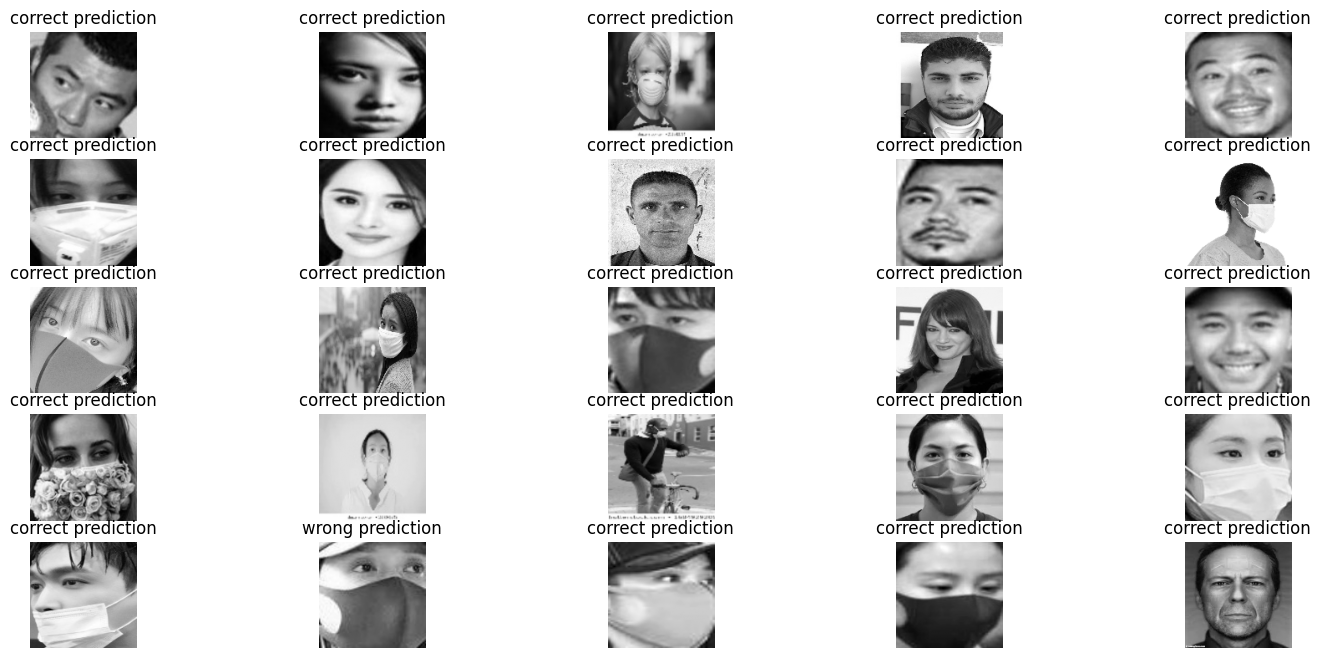

In [59]:
plot_(X_test,y_pred_cnn,y_true)

In [60]:
torch.save(nnet.state_dict(),"/home/aditya/VR_MiniProject/model/CNN")